# Initial Imports

In [1]:
# Basics
import pandas as pd
import numpy as np
from pathlib import Path

# PyViz
import matplotlib.pyplot as plt 
import plotly.express as px
import hvplot.pandas
import seaborn as sns

# NLP
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re

import nltk
import spacy
import string

# TesnorFlow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

# Others
from PIL import Image
pd.options.mode.chained_assignment = None


Bad key "text.kerning_factor" on line 4 in
/Users/devinaamangal/Desktop/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('/Users/devinaamangal/Project2/mbti_1.csv')
df.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [3]:
df.isnull().sum()

type     0
posts    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


In [5]:
df_1 = df.groupby('type').agg({'type':'count'})
df_1

type
type      
ENFJ   190
ENFP   675
ENTJ   231
ENTP   685
ESFJ    42
ESFP    48
ESTJ    39
ESTP    89
INFJ  1470
INFP  1832
INTJ  1091
INTP  1304
ISFJ   166
ISFP   271
ISTJ   205
ISTP   337

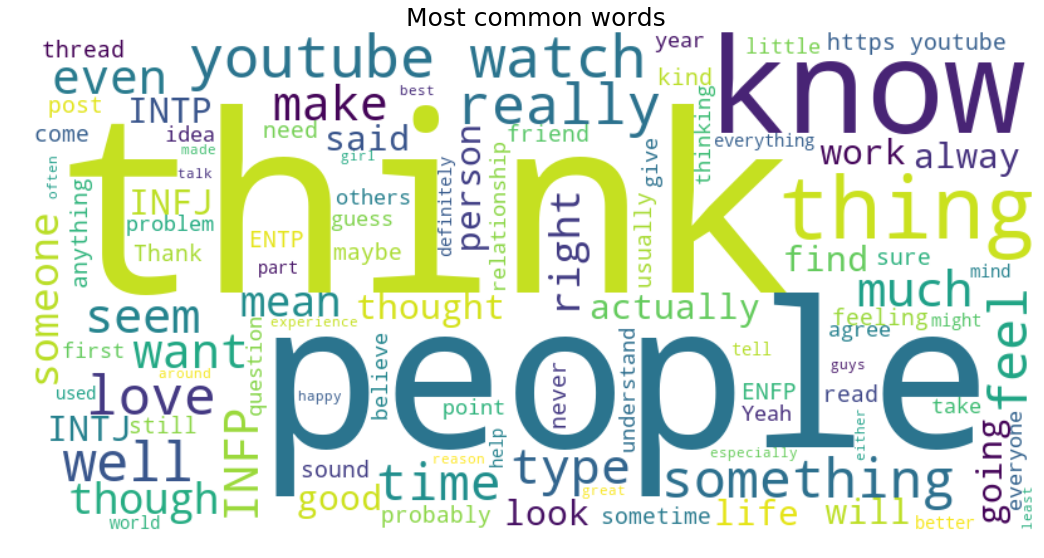

In [6]:
# Read the whole text.
text = ' '.join(df['posts'])

# Generate a word cloud image
stopwords = STOPWORDS
wordcloud = WordCloud(background_color='white', width=800, height=400, stopwords=stopwords, max_words=100, repeat=False, min_word_length=4).generate(text)

# Display the generated image:
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
sns.set_context('talk')
plt.title('Most common words', fontsize=25)
plt.savefig('mbti_cloud.png')
plt.show()

# Cleaning and Tokenizing

In [7]:
# Function to clean data ... will be useful later
def post_cleaner(post):
    """cleans individual posts`.
    Args:
        post-string
    Returns:
         cleaned up post`.
    """
    # Covert all uppercase characters to lower case
    post = post.lower() 
    
    # Remove |||
    post=post.replace('|||',"") 

    # Remove URLs, links etc
    post = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', post, flags=re.MULTILINE) 
    # This would have removed most of the links but probably not all 

    # Remove puntuations 
    puncs1=['@','#','$','%','^','&','*','(',')','-','_','+','=','{','}','[',']','|','\\','"',"'",';',':','<','>','/']
    for punc in puncs1:
        post=post.replace(punc,'') 

    puncs2=[',','.','?','!','\n']
    for punc in puncs2:
        post=post.replace(punc,' ') 
    # Remove extra white spaces
    post=re.sub( '\s+', ' ', post ).strip()
    return post

In [8]:
df["clean_posts"] = df["posts"].apply(post_cleaner)
df.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                         clean_posts  
0  and intj moments sportscenter not top ten play...  
1  im finding the lack of me in these posts very ...  
2  good one course to which i say i know thats my...  
3  dear intp i enjoyed our conversation the other...  
4  youre fired thats another silly misconception ...

In [10]:
from nltk.corpus import stopwords
from string import punctuation

In [11]:
Stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [12]:
def tokenizer(text):
    """Tokenizes text."""
    sw = set(Stop)
    regex = re.compile("[^a-zA-Z ]")
    regex2 = re.compile("[…\+,'’]")
    text = regex2.sub('', text)
    words = word_tokenize(text)
    words = [x.lower() for x in words]
    words = [x for x in words if x not in punctuation]
#     print(words)
    words = list(filter(lambda x:x not in punctuation, words))

    return [lemmatizer.lemmatize(word) for word in words if word not in sw]

In [13]:
df["tokens"] = df["clean_posts"].apply(tokenizer)
df.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                         clean_posts  \
0  and intj moments sportscenter not top ten play...   
1  im finding the lack of me in these posts very ...   
2  good one course to which i say i know thats my...   
3  dear intp i enjoyed our conversation the other...   
4  youre fired thats another silly misconception ...   

                                              tokens  
0  [intj, moment, sportscenter, top, ten, play, p...  
1  [im, finding, lack, post, alarming, sex, borin...  
2  [good, one, course, say, know, thats, blessing...  
3  [dear, intp, enjoyed, conversation, day, esote...  
4  [youre, fired, thats, another, silly, misconce...